In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from numpy import log
from pandas import Series

In [ ]:
# importing dataset
df = pd.read_csv('TCS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2410 non-null   object 
 1   Open       2410 non-null   float64
 2   High       2410 non-null   float64
 3   Low        2410 non-null   float64
 4   Close      2410 non-null   float64
 5   Adj Close  2410 non-null   float64
 6   Volume     2410 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 131.9+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2410 non-null   datetime64[ns]
 1   Open       2410 non-null   float64       
 2   High       2410 non-null   float64       
 3   Low        2410 non-null   float64       
 4   Close      2410 non-null   float64       
 5   Adj Close  2410 non-null   float64       
 6   Volume     2410 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 131.9 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


# Durbin-Watson Test

In [ ]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Open'])

0.0015501836761495041

In [ ]:
sm.stats.durbin_watson(df['Close'])

0.0016247191121125867

In [ ]:
sm.stats.durbin_watson(df['Volume'])

1.52960201224595

In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2410,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2.410000e+03
mean,2019-10-15 20:13:32.614107904,7.147378,7.337469,6.959859,7.142842,6.865693,4.658444e+05
min,2015-01-02 00:00:00,0.500000,0.550000,0.500000,0.510000,0.510000,3.000000e+04
25%,2017-05-24 06:00:00,4.160000,4.260000,4.050000,4.150000,3.916739,1.857000e+05
50%,2019-10-15 12:00:00,5.640000,5.770000,5.480000,5.625000,5.314457,2.864500e+05
75%,2022-03-07 18:00:00,9.647500,10.020000,9.415000,9.717500,9.474022,4.767750e+05
max,2024-07-31 00:00:00,22.750000,23.500000,22.139999,22.940001,21.443914,5.965440e+07
std,NaN,4.643374,4.754139,4.534671,4.647426,4.447691,1.336804e+06


In [ ]:
df.nunique()

,0
Date,2410
Open,1126
High,1135
Low,1098
Close,1124
Adj Close,1377
Volume,1990


<Axes: >

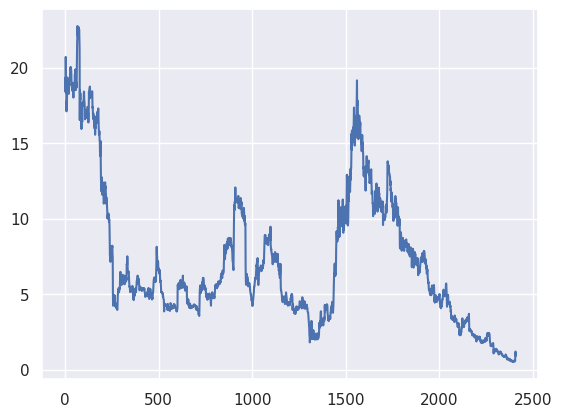

In [ ]:
df['Open'].plot()

In [ ]:
df['Time_Stamp'] = pd.DataFrame(df, columns=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800,2015-01-02
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300,2015-01-05
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700,2015-01-06
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600,2015-01-07
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300,2015-01-08


In [ ]:
df_final_model = df.set_index('Time_Stamp')
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2015-01-02,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800
2015-01-05,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300
2015-01-06,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700
2015-01-07,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600
2015-01-08,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300


In [ ]:
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2410 entries, 2015-01-02 to 2024-07-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2410 non-null   datetime64[ns]
 1   Open       2410 non-null   float64       
 2   High       2410 non-null   float64       
 3   Low        2410 non-null   float64       
 4   Close      2410 non-null   float64       
 5   Adj Close  2410 non-null   float64       
 6   Volume     2410 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 150.6 KB


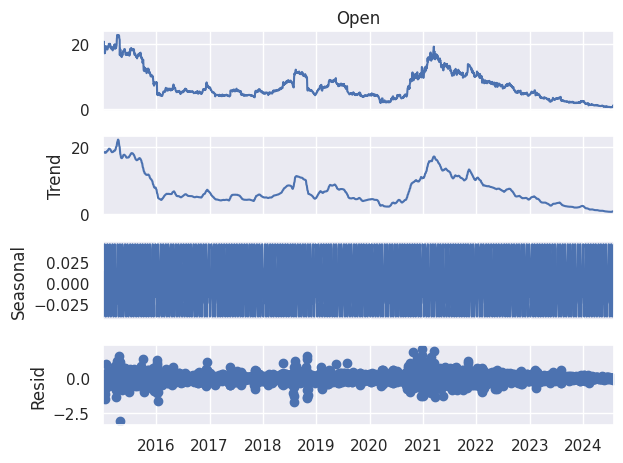

In [ ]:
# Decomposition to check dataset
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_final_model['Open'], period=12)
decompose.plot()
plt.show()

# Plot the boxplot of the 'Open' variable with respect to the different years

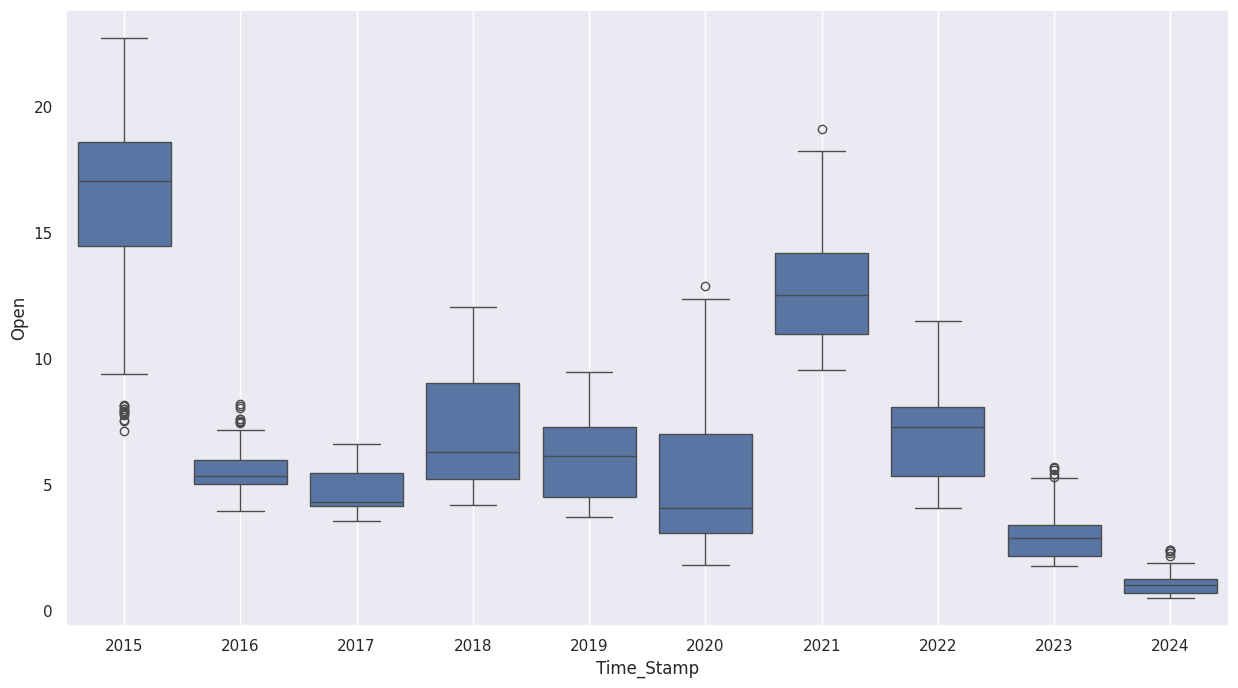

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.year, y = df_final_model['Open'])
plt.grid();

In [ ]:
df_final_model.index.year

Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='Time_Stamp', length=2410)

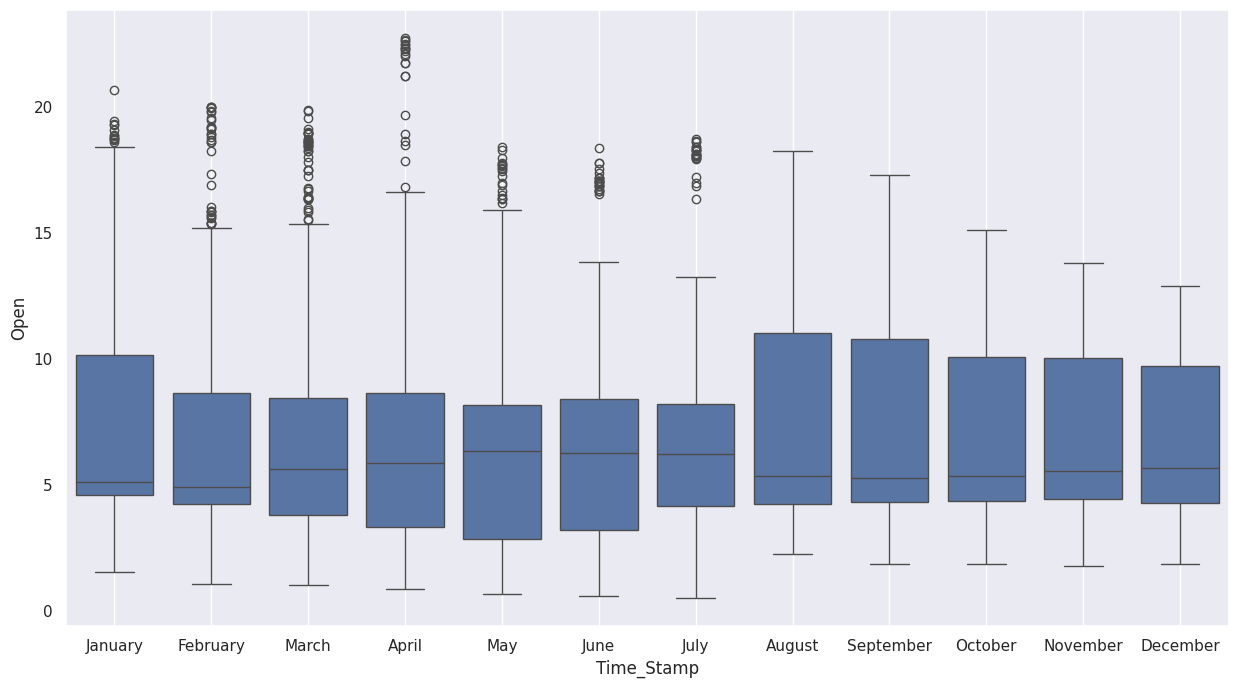

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.month_name(), y = df_final_model['Open'])
plt.grid();

# Augmented Dickey Fuller Test - To check time series data is stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df_final_model['Open'])

(-2.39029641693795,
 0.1444939244162599,
 15,
 2394,
 {'1%': -3.433084471827723,
  '5%': -2.862748051618385,
  '10%': -2.5674130966374444},
 1443.7867268737637)

In [ ]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or not")
    labels = ['ADF Stats', 'P-Values','#Lags', 'No of observation']
    for i, j in zip(result, labels):
        print(j + " :-> " + str(i))

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothes and my time series is Non-Stationary")

In [ ]:
check_adftest(df_final_model['Open'])

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -2.39029641693795
P-Values :-> 0.1444939244162599
#Lags :-> 15
No of observation :-> 2394
Weak Evidence against null hypothes and my time series is Non-Stationary


In [ ]:
df_final_model['1st Diff'] = df_final_model['Open'] - df_final_model['Open'].shift(1)

In [ ]:
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume,1st Diff
Time_Stamp,,,,,,,,
2015-01-02,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800,NaN
2015-01-05,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300,-0.180000
2015-01-06,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700,-0.720002
2015-01-07,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600,0.240000
2015-01-08,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300,2.070002
...,...,...,...,...,...,...,...,...
2024-07-25,2024-07-25,0.570000,1.440000,0.560000,1.050000,1.050000,59654400,0.030000
2024-07-26,2024-07-26,1.040000,1.290000,0.910000,1.200000,1.200000,4416200,0.470000
2024-07-29,2024-07-29,1.190000,1.370000,0.900000,0.970000,0.970000,3989300,0.150000


In [ ]:
check_adftest(df_final_model['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -12.671387004148531
P-Values :-> 1.2423340625782599e-23
#Lags :-> 14
No of observation :-> 2394
Strong evidence against null hypothesis and my time series is Stationary


In [ ]:
# split the data into train and test
start_date = df_final_model.index.min()
end_date = df_final_model.index.max()
print("Start Date of Stock  :", start_date)
print("End Data of the Stock :", end_date)

Start Date of Stock  : 2015-01-02 00:00:00
End Data of the Stock : 2024-07-31 00:00:00


In [ ]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2022-02-02')]
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2022-02-02')]

In [ ]:
train.shape, test.shape

((1784, 8), (626, 8))

In [ ]:
train_final = train[['1st Diff']]
test_final = test[['1st Diff']]

In [ ]:
train_final

,1st Diff
Time_Stamp,
2015-01-02,NaN
2015-01-05,-0.180000
2015-01-06,-0.720002
2015-01-07,0.240000
2015-01-08,2.070002
...,...
2022-01-26,0.490000
2022-01-27,-0.620000
2022-01-28,-0.410000


In [ ]:
test_final

,1st Diff
Time_Stamp,
2022-02-02,-0.03
2022-02-03,-0.30
2022-02-04,-0.25
2022-02-07,0.42
2022-02-08,-0.02
...,...
2024-07-25,0.03
2024-07-26,0.47
2024-07-29,0.15


In [ ]:
check_adftest(train_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -10.907252322733928
P-Values :-> 1.1199880826244538e-19
#Lags :-> 14
No of observation :-> 1768
Strong evidence against null hypothesis and my time series is Stationary


In [ ]:
check_adftest(test_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -14.812503055393151
P-Values :-> 2.0203044041566513e-27
#Lags :-> 5
No of observation :-> 620
Strong evidence against null hypothesis and my time series is Stationary


# Building Time Series Forecasting

## Facebook Prophet Model

In [ ]:
import prophet
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800,2015-01-02
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300,2015-01-05
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700,2015-01-06
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600,2015-01-07
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300,2015-01-08
...,...,...,...,...,...,...,...,...
2405,2024-07-25,0.570000,1.440000,0.560000,1.050000,1.050000,59654400,2024-07-25
2406,2024-07-26,1.040000,1.290000,0.910000,1.200000,1.200000,4416200,2024-07-26
2407,2024-07-29,1.190000,1.370000,0.900000,0.970000,0.970000,3989300,2024-07-29
2408,2024-07-30,0.920000,0.950000,0.880000,0.900000,0.900000,675600,2024-07-30


In [ ]:
df = df.iloc[:,:-1]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2410,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2.410000e+03
mean,2019-10-15 20:13:32.614107904,7.147378,7.337469,6.959859,7.142842,6.865693,4.658444e+05
min,2015-01-02 00:00:00,0.500000,0.550000,0.500000,0.510000,0.510000,3.000000e+04
25%,2017-05-24 06:00:00,4.160000,4.260000,4.050000,4.150000,3.916739,1.857000e+05
50%,2019-10-15 12:00:00,5.640000,5.770000,5.480000,5.625000,5.314457,2.864500e+05
75%,2022-03-07 18:00:00,9.647500,10.020000,9.415000,9.717500,9.474022,4.767750e+05
max,2024-07-31 00:00:00,22.750000,23.500000,22.139999,22.940001,21.443914,5.965440e+07
std,NaN,4.643374,4.754139,4.534671,4.647426,4.447691,1.336804e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2410 non-null   datetime64[ns]
 1   Open       2410 non-null   float64       
 2   High       2410 non-null   float64       
 3   Low        2410 non-null   float64       
 4   Close      2410 non-null   float64       
 5   Adj Close  2410 non-null   float64       
 6   Volume     2410 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 131.9 KB


In [ ]:
from prophet import Prophet

In [ ]:
df_prophet = df.rename(columns={'Date':'ds', 'Open':'y'})
df_prophet

,ds,y,High,Low,Close,Adj Close,Volume
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300
...,...,...,...,...,...,...,...
2405,2024-07-25,0.570000,1.440000,0.560000,1.050000,1.050000,59654400
2406,2024-07-26,1.040000,1.290000,0.910000,1.200000,1.200000,4416200
2407,2024-07-29,1.190000,1.370000,0.900000,0.970000,0.970000,3989300
2408,2024-07-30,0.920000,0.950000,0.880000,0.900000,0.900000,675600


In [ ]:
df_prophet['ds'].max()

Timestamp('2024-07-31 00:00:00')

In [ ]:
m = Prophet()
model = m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/xzra9zse.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/sn6e_l1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78734', 'data', 'file=/tmp/tmp_cciamly/xzra9zse.json', 'init=/tmp/tmp_cciamly/sn6e_l1u.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelol5htsa4/prophet_model-20250904115641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:56:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:56:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
# Last date - 2024-07-25
future_global = model.make_future_dataframe(periods=100, freq='D')
future_global.tail()

,ds
2505,2024-11-04
2506,2024-11-05
2507,2024-11-06
2508,2024-11-07
2509,2024-11-08


In [ ]:
#2024-12-07
len(df_prophet)

2410

In [ ]:
df_prophet.tail()

,ds,y,High,Low,Close,Adj Close,Volume
2405,2024-07-25,0.57,1.44,0.56,1.05,1.05,59654400
2406,2024-07-26,1.04,1.29,0.91,1.20,1.20,4416200
2407,2024-07-29,1.19,1.37,0.90,0.97,0.97,3989300
2408,2024-07-30,0.92,0.95,0.88,0.90,0.90,675600
2409,2024-07-31,0.91,0.94,0.85,0.88,0.88,486600


In [ ]:
future_global.tail(20)

,ds
2490,2024-10-20
2491,2024-10-21
2492,2024-10-22
2493,2024-10-23
2494,2024-10-24
2495,2024-10-25
2496,2024-10-26
2497,2024-10-27
2498,2024-10-28
2499,2024-10-29


In [ ]:
len(future_global)

2510

In [ ]:
2510-2410

100

In [ ]:
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,20.570209,18.921079,21.795944,20.570209,20.570209,-0.154898,-0.154898,-0.154898,0.364309,0.364309,0.364309,-0.519207,-0.519207,-0.519207,0.0,0.0,0.0,20.415311
1,2015-01-05,20.503145,18.886770,21.716785,20.503145,20.503145,-0.208523,-0.208523,-0.208523,0.363423,0.363423,0.363423,-0.571946,-0.571946,-0.571946,0.0,0.0,0.0,20.294622
2,2015-01-06,20.480790,18.840972,21.564643,20.480790,20.480790,-0.218895,-0.218895,-0.218895,0.370257,0.370257,0.370257,-0.589152,-0.589152,-0.589152,0.0,0.0,0.0,20.261895
3,2015-01-07,20.458436,18.755690,21.627822,20.458436,20.458436,-0.244224,-0.244224,-0.244224,0.361580,0.361580,0.361580,-0.605804,-0.605804,-0.605804,0.0,0.0,0.0,20.214212
4,2015-01-08,20.436081,18.803285,21.515616,20.436081,20.436081,-0.276297,-0.276297,-0.276297,0.345369,0.345369,0.345369,-0.621665,-0.621665,-0.621665,0.0,0.0,0.0,20.159785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,2024-11-04,-1.392873,-2.781226,0.335018,-1.835584,-0.963490,0.253981,0.253981,0.253981,0.363423,0.363423,0.363423,-0.109442,-0.109442,-0.109442,0.0,0.0,0.0,-1.138892
2506,2024-11-05,-1.401644,-2.706592,0.424645,-1.853847,-0.958905,0.260328,0.260328,0.260328,0.370257,0.370257,0.370257,-0.109929,-0.109929,-0.109929,0.0,0.0,0.0,-1.141316
2507,2024-11-06,-1.410415,-2.807212,0.452899,-1.872519,-0.959290,0.252274,0.252274,0.252274,0.361580,0.361580,0.361580,-0.109306,-0.109306,-0.109306,0.0,0.0,0.0,-1.158141
2508,2024-11-07,-1.419186,-2.811574,0.311255,-1.889994,-0.957191,0.237776,0.237776,0.237776,0.345369,0.345369,0.345369,-0.107593,-0.107593,-0.107593,0.0,0.0,0.0,-1.181410


In [ ]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
prediction[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(100)

,ds,yhat_lower,yhat_upper,yhat
2410,2024-08-01,-1.298418,1.580010,0.114368
2411,2024-08-02,-1.368690,1.486458,0.113171
2412,2024-08-03,-2.590140,0.276574,-1.173451
2413,2024-08-04,-2.615958,0.283364,-1.192989
2414,2024-08-05,-1.520266,1.381369,0.053687
...,...,...,...,...
2505,2024-11-04,-2.781226,0.335018,-1.138892
2506,2024-11-05,-2.706592,0.424645,-1.141316
2507,2024-11-06,-2.807212,0.452899,-1.158141
2508,2024-11-07,-2.811574,0.311255,-1.181410


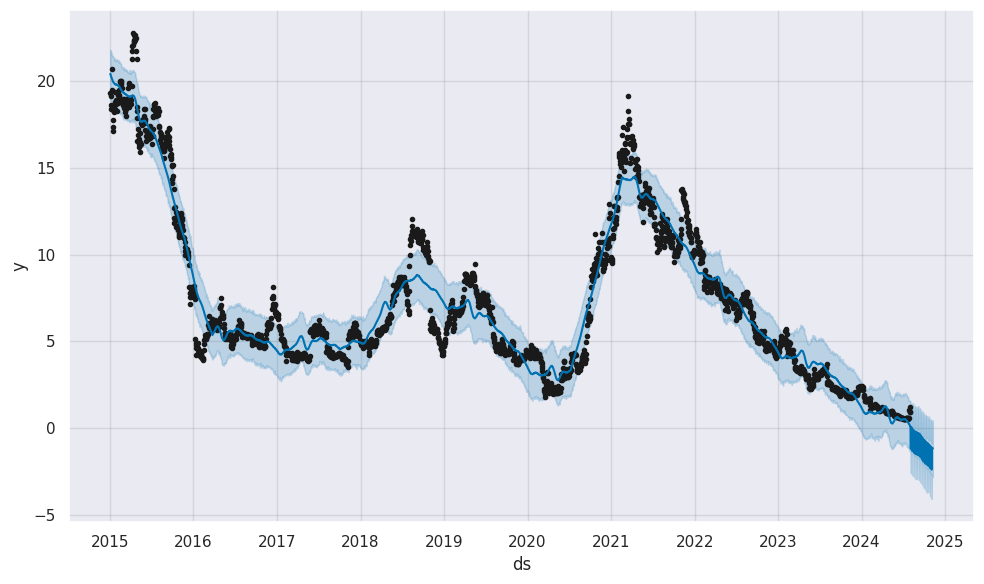

In [ ]:
model.plot(prediction)
plt.show()

In [ ]:
# ARIMA = AR = Partial autocorrelation (P)
# I - integrated (Difference) = D = 1
# MA - Auto correlation (Q)
# PARAMETER = P D Q


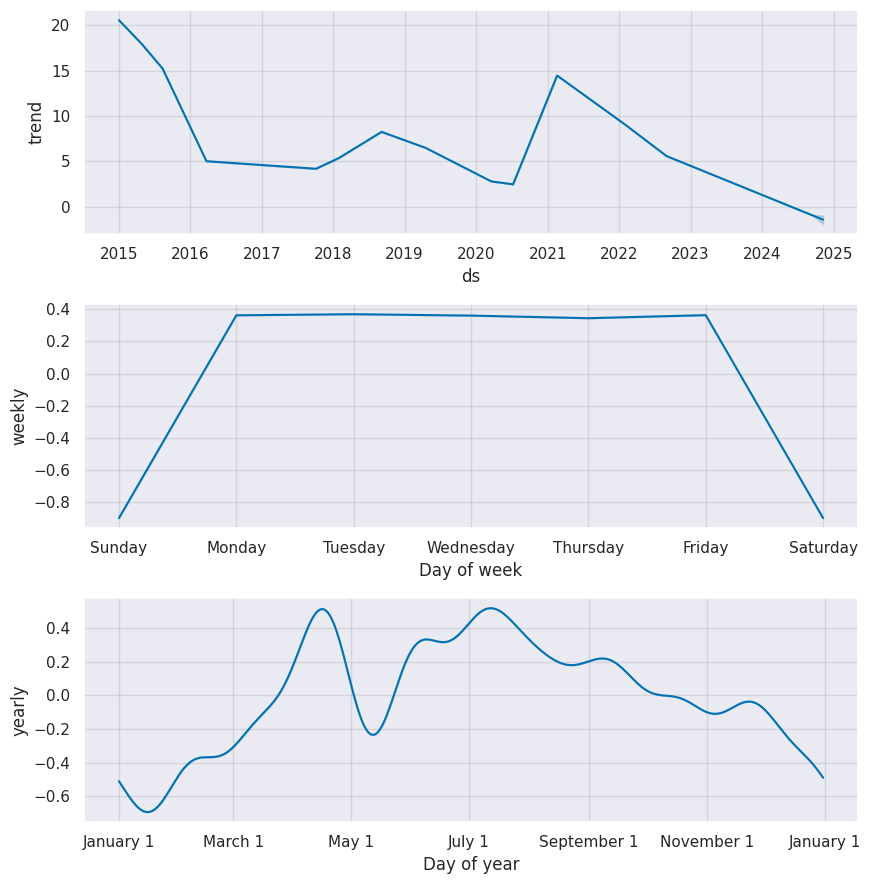

In [ ]:
model.plot_components(prediction)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Merge actual and predicted values for evaluation
evaluation_df = test.merge(prediction, left_index=True, right_on='ds', how='left')

# Calculate metrics
mae = mean_absolute_error(evaluation_df['Open'], evaluation_df['yhat'])
mse = mean_squared_error(evaluation_df['Open'], evaluation_df['yhat'])
rmse = sqrt(mse)
mape = np.mean(np.abs((evaluation_df['Open'] - evaluation_df['yhat']) / evaluation_df['Open'])) * 100

# Store metrics in a dictionary
evaluation_metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape
}

# Print the metrics
print("Prophet Model Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

Prophet Model Evaluation Metrics:
MAE: 0.4919
MSE: 0.3611
RMSE: 0.6009
MAPE: 17.9797


## ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

# Determine ARIMA order using auto_arima on the differenced training data
# The data was differenced once, so d=1
arima_model = auto_arima(train_final['1st Diff'].dropna(), seasonal=False, suppress_warnings=True)
order = arima_model.order
print(f"Determined ARIMA order (p, d, q): {order}")

# Fit ARIMA model
# Use the original 'Open' column for fitting ARIMA with d=1
arima_model_fit = ARIMA(train['Open'], order=order).fit()

# Make predictions
arima_predictions_diff = arima_model_fit.predict(start=len(train_final.dropna()), end=len(df_final_model['1st Diff'].dropna()) - 1)

last_train_open = train['Open'].iloc[-1]
arima_predictions = last_train_open + arima_predictions_diff.cumsum()

# Ensure predictions align with the test set index
arima_predictions.index = test.index

# Calculate evaluation metrics for ARIMA
arima_mae = mean_absolute_error(test['Open'], arima_predictions)
arima_mse = mean_squared_error(test['Open'], arima_predictions)
arima_rmse = sqrt(arima_mse)
arima_mape = np.mean(np.abs((test['Open'] - arima_predictions) / test['Open'])) * 100

# Store ARIMA metrics in a dictionary
arima_evaluation_metrics = {
    'MAE': arima_mae,
    'MSE': arima_mse,
    'RMSE': arima_rmse,
    'MAPE': arima_mape
}

# Print ARIMA metrics
print("\nARIMA Model Evaluation Metrics:")
for metric, value in arima_evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

# Compare with Prophet metrics
print("\nComparison with Prophet Model:")
print(f"Prophet MAE: {evaluation_metrics['MAE']:.4f}, ARIMA MAE: {arima_evaluation_metrics['MAE']:.4f}")
print(f"Prophet MSE: {evaluation_metrics['MSE']:.4f}, ARIMA MSE: {arima_evaluation_metrics['MSE']:.4f}")
print(f"Prophet RMSE: {evaluation_metrics['RMSE']:.4f}, ARIMA RMSE: {arima_evaluation_metrics['RMSE']:.4f}")
print(f"Prophet MAPE: {evaluation_metrics['MAPE']:.4f}, ARIMA MAPE: {arima_evaluation_metrics['MAPE']:.4f}")

Determined ARIMA order (p, d, q): (2, 0, 2)

ARIMA Model Evaluation Metrics:
MAE: 3225.4072
MSE: 13896749.5564
RMSE: 3727.8344
MAPE: 214525.6199

Comparison with Prophet Model:
Prophet MAE: 0.4919, ARIMA MAE: 3225.4072
Prophet MSE: 0.3611, ARIMA MSE: 13896749.5564
Prophet RMSE: 0.6009, ARIMA RMSE: 3727.8344
Prophet MAPE: 17.9797, ARIMA MAPE: 214525.6199


## Auto-ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

# Determine ARIMA order using auto_arima on the differenced training data
# The data was differenced once, so d=1
arima_model = auto_arima(train_final['1st Diff'].dropna(), seasonal=False, suppress_warnings=True)
order = arima_model.order
print(f"Determined ARIMA order (p, d, q): {order}")

# Fit ARIMA model
# Use the original 'Open' column for fitting ARIMA with d=1
arima_model_fit = ARIMA(train['Open'], order=(order[0], 1, order[2])).fit()

# Make predictions
# Predict the differenced values first
arima_predictions_diff = arima_model_fit.predict(start=len(train), end=len(df_final_model) - 1)

last_train_open = train['Open'].iloc[-1]
arima_predictions = last_train_open + arima_predictions_diff.cumsum()

# Ensure predictions align with the test set index
arima_predictions.index = test.index

# Calculate evaluation metrics for ARIMA
arima_mae = mean_absolute_error(test['Open'], arima_predictions)
arima_mse = mean_squared_error(test['Open'], arima_predictions)
arima_rmse = sqrt(arima_mse)
arima_mape = np.mean(np.abs((test['Open'] - arima_predictions) / test['Open'])) * 100

# Store ARIMA metrics in a dictionary
arima_evaluation_metrics = {
    'MAE': arima_mae,
    'MSE': arima_mse,
    'RMSE': arima_rmse,
    'MAPE': arima_mape
}

# Print ARIMA metrics
print("\nARIMA Model Evaluation Metrics:")
for metric, value in arima_evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

# Compare with Prophet metrics
print("\nComparison with Prophet Model:")
print(f"Prophet MAE: {evaluation_metrics['MAE']:.4f}, ARIMA MAE: {arima_evaluation_metrics['MAE']:.4f}")
print(f"Prophet MSE: {evaluation_metrics['MSE']:.4f}, ARIMA MSE: {arima_evaluation_metrics['MSE']:.4f}")
print(f"Prophet RMSE: {evaluation_metrics['RMSE']:.4f}, ARIMA RMSE: {arima_evaluation_metrics['RMSE']:.4f}")
print(f"Prophet MAPE: {evaluation_metrics['MAPE']:.4f}, ARIMA MAPE: {arima_evaluation_metrics['MAPE']:.4f}")

Determined ARIMA order (p, d, q): (2, 0, 2)

ARIMA Model Evaluation Metrics:
MAE: 3187.7371
MSE: 13534013.1639
RMSE: 3678.8603
MAPE: 211510.4472

Comparison with Prophet Model:
Prophet MAE: 0.4919, ARIMA MAE: 3187.7371
Prophet MSE: 0.3611, ARIMA MSE: 13534013.1639
Prophet RMSE: 0.6009, ARIMA RMSE: 3678.8603
Prophet MAPE: 17.9797, ARIMA MAPE: 211510.4472


## Cross-Validation

In [ ]:
from sklearn.model_selection import ParameterGrid
from prophet.diagnostics import cross_validation, performance_metrics

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}
grid = ParameterGrid(param_grid)

best_params = None
best_rmse = float('inf')

# Time series cross-validation
# Initial training period: ~70% of data
initial = f'{int(len(df_prophet) * 0.7)} days'
# Period for each fold: ~10% of data
period = f'{int(len(df_prophet) * 0.1)} days'
# Horizon for forecasting: ~20% of data
horizon = f'{int(len(df_prophet) * 0.2)} days'

print(f"Performing time series cross-validation with initial training period: {initial}, period: {period}, horizon: {horizon}")

for params in grid:
    print(f"Training with parameters: {params}")
    model = Prophet(**params)
    model.fit(df_prophet)

    # Perform cross-validation
    df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon, parallel="processes")

    # Calculate performance metrics
    df_p = performance_metrics(df_cv, metrics=['rmse'])

    # Get the average RMSE over the horizon
    mean_rmse = df_p['rmse'].mean()
    print(f"RMSE: {mean_rmse}")

    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_params = params
        print(f"New best RMSE: {best_rmse} with params: {best_params}")

print("\nBest Parameters found:")
print(best_params)
print(f"Best RMSE: {best_rmse}")

# Train the final model with the best parameters
final_model = Prophet(**best_params)
final_model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/1f1wburz.json


Performing time series cross-validation with initial training period: 1687 days, period: 241 days, horizon: 482 days
Training with parameters: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/tjo_l0m2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55166', 'data', 'file=/tmp/tmp_cciamly/1f1wburz.json', 'init=/tmp/tmp_cciamly/tjo_l0m2.json', 'output', 'file=/tmp/tmp_cciamly/prophet_model8i1bt1ae/prophet_model-20250904115858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:58:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:58:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497b982c0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/gv8kuyb3.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 6.561372032230415
New best RMSE: 6.561372032230415 with params: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}
Training with parameters: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/4e2_1e2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/270q92iz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5650', 'data', 'file=/tmp/tmp_cciamly/4e2_1e2f.json', 'init=/tmp/tmp_cciamly/270q92iz.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelhwrgjtdd/prophet_model-20250904115906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:59:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:59:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495dfae10>
DEBUG:cmdstanpy:input tempfile: /

RMSE: 6.641789760454281
Training with parameters: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


11:59:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495e0c680>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/fd1zj0ij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/cldvuflj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/5xgaqxl7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57338', 'data', 'file=/tmp/tmp_cciamly/fd1zj0ij.json', 'init=/tmp/tmp_cciamly/5xgaqxl7.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelv4pqmf_1/prophet_model-20250904115916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/cma74irh.json
DEBUG

RMSE: 6.560032653777317
New best RMSE: 6.560032653777317 with params: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}
Training with parameters: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/9dtw24b2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43260', 'data', 'file=/tmp/tmp_cciamly/k0cu9x0t.json', 'init=/tmp/tmp_cciamly/9dtw24b2.json', 'output', 'file=/tmp/tmp_cciamly/prophet_model2k9yxs6x/prophet_model-20250904115923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:59:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497ca7ce0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/flw6vbta.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 6.5095306270931586
New best RMSE: 6.5095306270931586 with params: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}
Training with parameters: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


11:59:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab49eb71940>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/506lancw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/vo2xnwk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/qx7vreau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=481', 'data', 'file=/tmp/tmp_cciamly/506lancw.json', 'init=/tmp/tmp_cciamly/qx7vreau.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelwh7brqhj/prophet_model-20250904115932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/oscrodx1.json
11:59:3

RMSE: 6.336334252822229
New best RMSE: 6.336334252822229 with params: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}
Training with parameters: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


11:59:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495e0fd40>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/xg0bz7q2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/8ajjjj85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/judrtbq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49340', 'data', 'file=/tmp/tmp_cciamly/xg0bz7q2.json', 'init=/tmp/tmp_cciamly/judrtbq7.json', 'output', 'file=/tmp/tmp_cciamly/prophet_model2q1zluoo/prophet_model-20250904115942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

RMSE: 6.368167481440138
Training with parameters: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/fz4kxnlv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85520', 'data', 'file=/tmp/tmp_cciamly/r5co0zi9.json', 'init=/tmp/tmp_cciamly/fz4kxnlv.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelvzvqs1yv/prophet_model-20250904115954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497ca5040>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/ezm0g5x_.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 6.320049454173758
New best RMSE: 6.320049454173758 with params: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Training with parameters: {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34534', 'data', 'file=/tmp/tmp_cciamly/4ecjp_8j.json', 'init=/tmp/tmp_cciamly/8qp7ggs6.json', 'output', 'file=/tmp/tmp_cciamly/prophet_model0pey9rbb/prophet_model-20250904120003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:00:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:00:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497b75340>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/437hykty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/i5eenm20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/pr3e4

RMSE: 6.3504197923908485
Training with parameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


12:00:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495df8230>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/eh0_ia7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/_1cmd4lp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/y6tl4fgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/daritamg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31878', 'data', 'file=/tmp/tmp_cciamly/_1cmd4lp.json', 'init=/tmp/tmp_cciamly/daritamg.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelf8b6w5hx/prophet_model-20250904120015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:00

RMSE: 7.839472213956383
Training with parameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


12:00:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495dc0bc0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/rreg8in5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/lir6nvfz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/djy16qk4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88792', 'data', 'file=/tmp/tmp_cciamly/rreg8in5.json', 'init=/tmp/tmp_cciamly/djy16qk4.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelgmcra_uh/prophet_model-20250904120019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/ez8vgwgn.json
DEBUG

RMSE: 7.992284379874841
Training with parameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/nu60dprv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55448', 'data', 'file=/tmp/tmp_cciamly/hhq0ob_y.json', 'init=/tmp/tmp_cciamly/nu60dprv.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelqvfkec48/prophet_model-20250904120022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:00:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:00:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495dfa1e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/_ft983x7.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 7.909807540220257
Training with parameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/2k_o3szm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44434', 'data', 'file=/tmp/tmp_cciamly/pmeuf6vh.json', 'init=/tmp/tmp_cciamly/2k_o3szm.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelc_q89k86/prophet_model-20250904120026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:00:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:00:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495dfb800>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/8fpwxy77.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 7.942990500842994
Training with parameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


12:00:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497b75340>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/xcgmjjrp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/amlnzk19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/5mpr16su.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1392', 'data', 'file=/tmp/tmp_cciamly/xcgmjjrp.json', 'init=/tmp/tmp_cciamly/5mpr16su.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelmly_3fzu/prophet_model-20250904120032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:00:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstan

RMSE: 7.762600428343413
Training with parameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


12:00:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497ce8440>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/3h4sfwsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/67x9cx27.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/36ww1h6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/5wvzdr5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21131', 'data', 'file=/tmp/tmp_cciamly/67x9cx27.json', 'init=/tmp/tmp_cciamly/5wvzdr5i.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modeljk4x1uqo/prophet_model-20250

RMSE: 8.893332606983229
Training with parameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


12:00:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497b75340>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/1kbm9qtx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/13ddwa9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/vc62ojlr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57404', 'data', 'file=/tmp/tmp_cciamly/1kbm9qtx.json', 'init=/tmp/tmp_cciamly/vc62ojlr.json', 'output', 'file=/tmp/tmp_cciamly/prophet_model0wv_ymoz/prophet_model-20250904120042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:00:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

RMSE: 9.079832044520218
Training with parameters: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


12:00:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab49ec101a0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/8f14lhep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/g1s61b81.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/4y0fcw06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/dfhe2q5b.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19644', 'data', 'file=/tmp/tmp_cciamly/g1s61b81.json', 'init=/tmp/tmp_cciamly/4y0fcw06.json', 'output', 'file=/tmp/tmp_cciamly/prophet_model_pb0z3es/prophet_model-20250904120051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:00

RMSE: 9.21838788667302
Training with parameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


12:00:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab49ec13350>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/qfhxvbrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/_6sglnh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/itnhgq8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1762', 'data', 'file=/tmp/tmp_cciamly/_6sglnh4.json', 'init=/tmp/tmp_cciamly/itnhgq8b.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelvhr8kro_/prophet_model-20250904120059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/ia64urpr.json
12:00:

RMSE: 9.117153567971087
Training with parameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


12:01:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab49ec13da0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/2m63gray.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/ni5r7tb_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/lzo3m74r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/z5h6uq9d.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95483', 'data', 'file=/tmp/tmp_cciamly/2m63gray.json', 'init=/tmp/tmp_cciamly/lzo3m74r.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelcrtgdn0g/prophet_model-20250904120109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

RMSE: 9.122445494360944
Training with parameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/yoiz4d6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33505', 'data', 'file=/tmp/tmp_cciamly/0jti77zr.json', 'init=/tmp/tmp_cciamly/yoiz4d6n.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelebvnr411/prophet_model-20250904120116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495de5760>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/devbvdj1.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 9.124350167115756
Training with parameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


12:01:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497b75340>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/yp4ugt1f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/o3lnn6ou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/zavb3exh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39924', 'data', 'file=/tmp/tmp_cciamly/yp4ugt1f.json', 'init=/tmp/tmp_cciamly/zavb3exh.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modely1ek4llz/prophet_model-20250904120127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/nshi23x_.json
DEBUG

RMSE: 9.119952100517619
Training with parameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/gcv3gaa8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98971', 'data', 'file=/tmp/tmp_cciamly/uuervzpl.json', 'init=/tmp/tmp_cciamly/gcv3gaa8.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelo05g2us5/prophet_model-20250904120135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497b75340>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/gv2y6gn5.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 9.175083183147764
Training with parameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/eg5mnel9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18987', 'data', 'file=/tmp/tmp_cciamly/e6884sj_.json', 'init=/tmp/tmp_cciamly/eg5mnel9.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelxkrqqf7f/prophet_model-20250904120144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab49eaa2150>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/8fi0r6cc.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 9.455335446551707
Training with parameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/qe_hloq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94996', 'data', 'file=/tmp/tmp_cciamly/i2z2tv9j.json', 'init=/tmp/tmp_cciamly/qe_hloq_.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelpe2az6ge/prophet_model-20250904120157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:02:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab4962c4860>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/4bh1hjm1.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 9.219765052943508
Training with parameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


INFO:cmdstanpy:Chain [1] start processing
12:02:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497b75340>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/qbf0ome6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/gzk0o3r1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/ki7w0tbr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57014', 'data', 'file=/tmp/tmp_cciamly/qbf0ome6.json', 'init=/tmp/tmp_cciamly/ki7w0tbr.json', 'output', 'file=/tmp/tmp_cciamly/prophet_model0k37_ixv/prophet_model-20250904120224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input temp

RMSE: 9.195960729123703
Training with parameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


12:02:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497ce9460>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/pxnh8ljs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/9cx2itrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/1npcbrfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/mdogzfha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54504', 'data', 'file=/tmp/tmp_cciamly/pxnh8ljs.json', 'init=/tmp/tmp_cciamly/1npcbrfb.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelycgkrsls/prophet_model-20250904120247.csv', 'method=optimize', 'algorithm=lbfgs

RMSE: 8.814052179384552
Training with parameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/483j5t37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9289', 'data', 'file=/tmp/tmp_cciamly/ackr958n.json', 'init=/tmp/tmp_cciamly/483j5t37.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelnqt_01ai/prophet_model-20250904120258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:02:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495dfb740>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/4bkyb3pu.json
DEBUG:cmdstanpy:input tempfile: /

RMSE: 8.837879077777613
Training with parameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


12:03:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495e0fd70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/vo9zhn18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/junr2e8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/4dnpuu9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/p7_q7u5e.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20895', 'data', 'file=/tmp/tmp_cciamly/vo9zhn18.json', 'init=/tmp/tmp_cciamly/4dnpuu9y.json', 'output', 'file=/tmp/tmp_cciamly/prophet_model12dwz5e3/prophet_model-20250904120313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

RMSE: 8.843595176707614
Training with parameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}


12:03:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497ca5f70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/a4sf88ph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/js4rwtoo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/5ojdb7zd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10848', 'data', 'file=/tmp/tmp_cciamly/a4sf88ph.json', 'init=/tmp/tmp_cciamly/5ojdb7zd.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modela9ptk45p/prophet_model-20250904120325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

RMSE: 8.841725312524014
Training with parameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/mo5osjhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16027', 'data', 'file=/tmp/tmp_cciamly/97ylqfns.json', 'init=/tmp/tmp_cciamly/mo5osjhp.json', 'output', 'file=/tmp/tmp_cciamly/prophet_model0t0wk37u/prophet_model-20250904120334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab497b75340>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/355sm2mr.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 9.09790695106123
Training with parameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/1zlehcqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86303', 'data', 'file=/tmp/tmp_cciamly/7k_mwu0m.json', 'init=/tmp/tmp_cciamly/1zlehcqx.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelfow0yqbw/prophet_model-20250904120348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495e4e060>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/ll5ih5l6.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 9.22577683998259
Training with parameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/stmkkxai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97', 'data', 'file=/tmp/tmp_cciamly/6456d3mc.json', 'init=/tmp/tmp_cciamly/stmkkxai.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelx6usj2xn/prophet_model-20250904120404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab495dc7710>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/2ki2zwwh.json
DEBUG:cmdstanpy:input tempfile: /tm

RMSE: 9.138083399412723
Training with parameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/mg933f4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64219', 'data', 'file=/tmp/tmp_cciamly/9mq62wtj.json', 'init=/tmp/tmp_cciamly/mg933f4_.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelbz3ovmpu/prophet_model-20250904120419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2019-12-18 00:00:00 and 2023-04-06 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ab4962e70b0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/sxu4fidz.json
DEBUG:cmdstanpy:input tempfile: 

RMSE: 9.11666111862184

Best Parameters found:
{'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 6.320049454173758


12:04:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Calculate the difference between actual and predicted 'Open' price
evaluation_df['residual'] = evaluation_df['Open'] - evaluation_df['yhat']

# Calculate the mean and standard deviation of the residuals
residual_mean = evaluation_df['residual'].mean()
residual_std = evaluation_df['residual'].std()

# Calculate the z-score for each residual
evaluation_df['z_score'] = (evaluation_df['residual'] - residual_mean) / residual_std

# Identify anomalies based on a z-score threshold (e.g., |z-score| > 3)
evaluation_df['is_anomaly'] = evaluation_df['z_score'].apply(lambda x: abs(x) > 3)

# Display the rows with anomalies
anomalies = evaluation_df[evaluation_df['is_anomaly']]
print("Identified Anomalies:")
display(anomalies[['Date', 'Open', 'yhat', 'residual', 'z_score', 'is_anomaly']])

Identified Anomalies:


,Date,Open,yhat,residual,z_score,is_anomaly


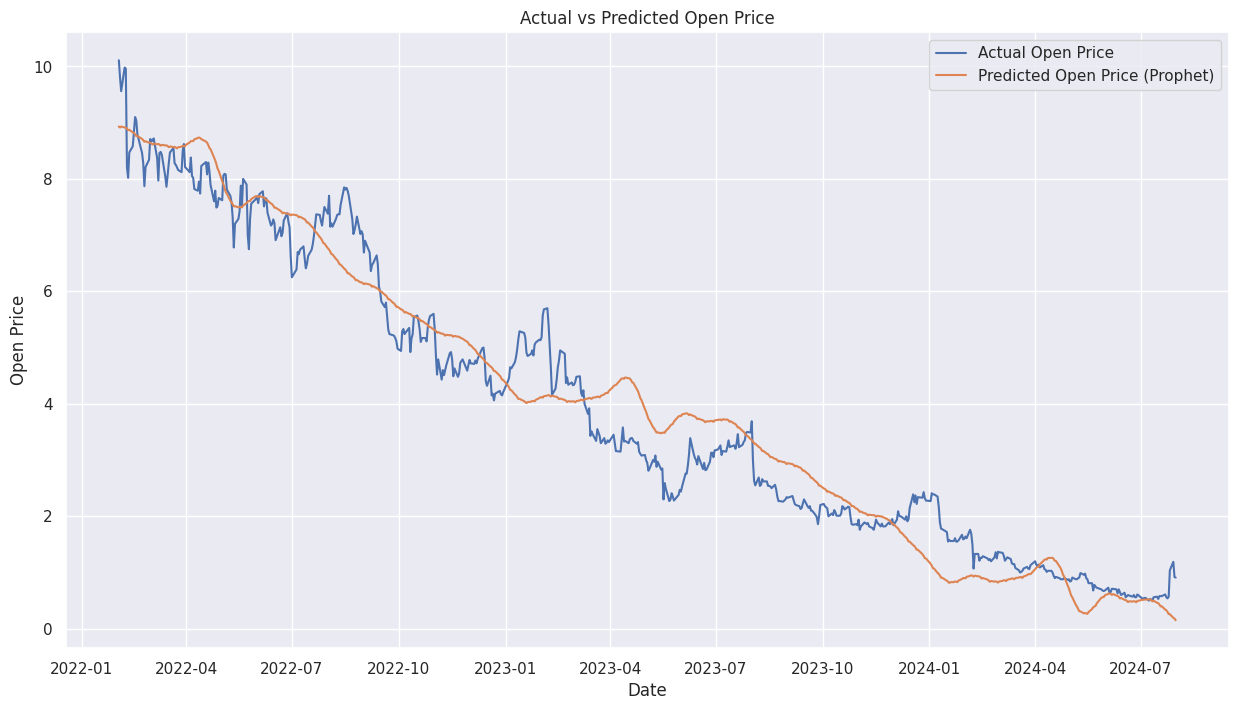

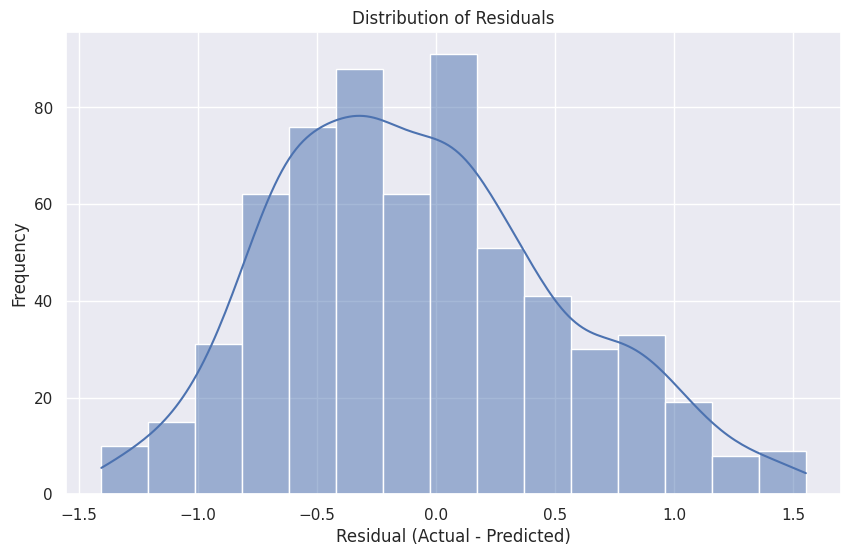

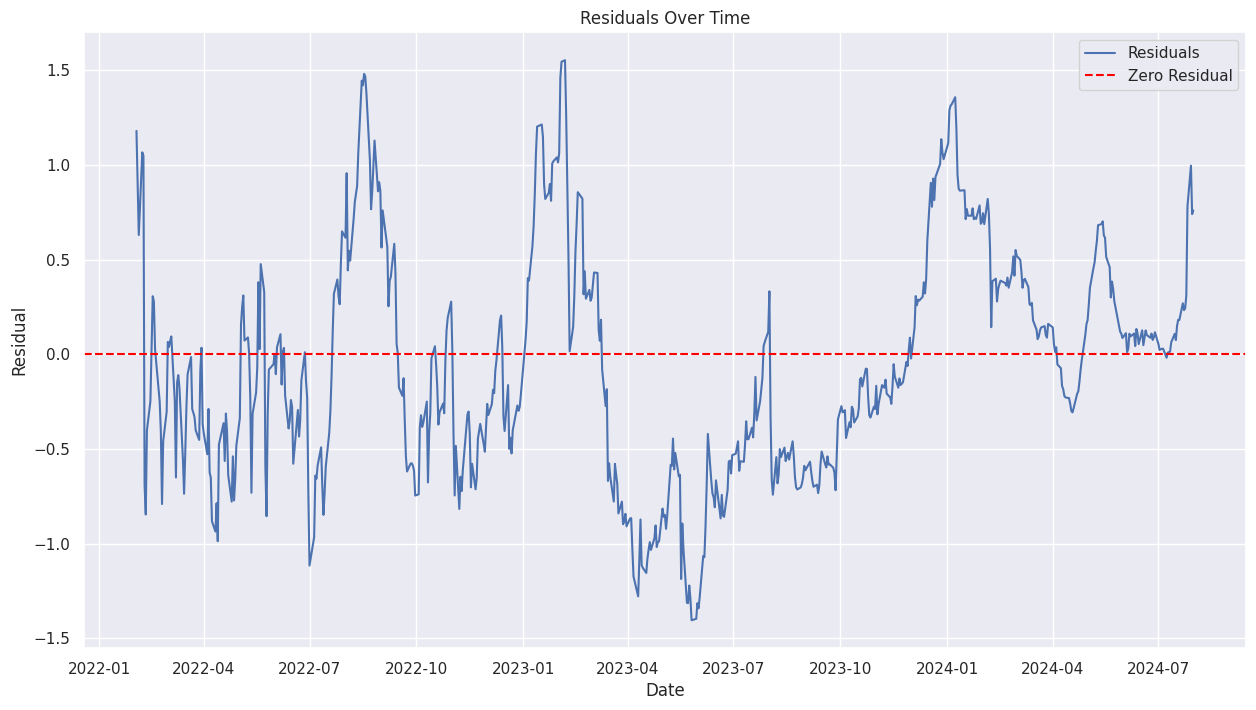

In [ ]:
# Visualize the 'Open' price and the predicted 'yhat'
plt.figure(figsize=(15, 8))
plt.plot(evaluation_df['Date'], evaluation_df['Open'], label='Actual Open Price')
plt.plot(evaluation_df['Date'], evaluation_df['yhat'], label='Predicted Open Price (Prophet)')
plt.title('Actual vs Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(evaluation_df['residual'].dropna(), kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

# Plot the residuals over time
plt.figure(figsize=(15, 8))
plt.plot(evaluation_df['Date'], evaluation_df['residual'], label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Identify anomalies based on a z-score threshold of 2.5
evaluation_df['is_anomaly'] = evaluation_df['z_score'].apply(lambda x: abs(x) > 2.5)

# Display the rows with anomalies using the adjusted threshold
anomalies = evaluation_df[evaluation_df['is_anomaly']]
print("Identified Anomalies (Z-score threshold > 2.5):")
display(anomalies[['Date', 'Open', 'yhat', 'residual', 'z_score', 'is_anomaly']])

Identified Anomalies (Z-score threshold > 2.5):


,Date,Open,yhat,residual,z_score,is_anomaly
1917,2022-08-15,7.85,6.405339,1.444661,2.541194,True
1919,2022-08-17,7.84,6.359698,1.480302,2.600892,True
1920,2022-08-18,7.79,6.322608,1.467392,2.579268,True
2035,2023-02-02,5.57,4.109576,1.460424,2.567597,True
2036,2023-02-03,5.68,4.135578,1.544422,2.708294,True
2037,2023-02-06,5.70,4.147703,1.552297,2.721484,True


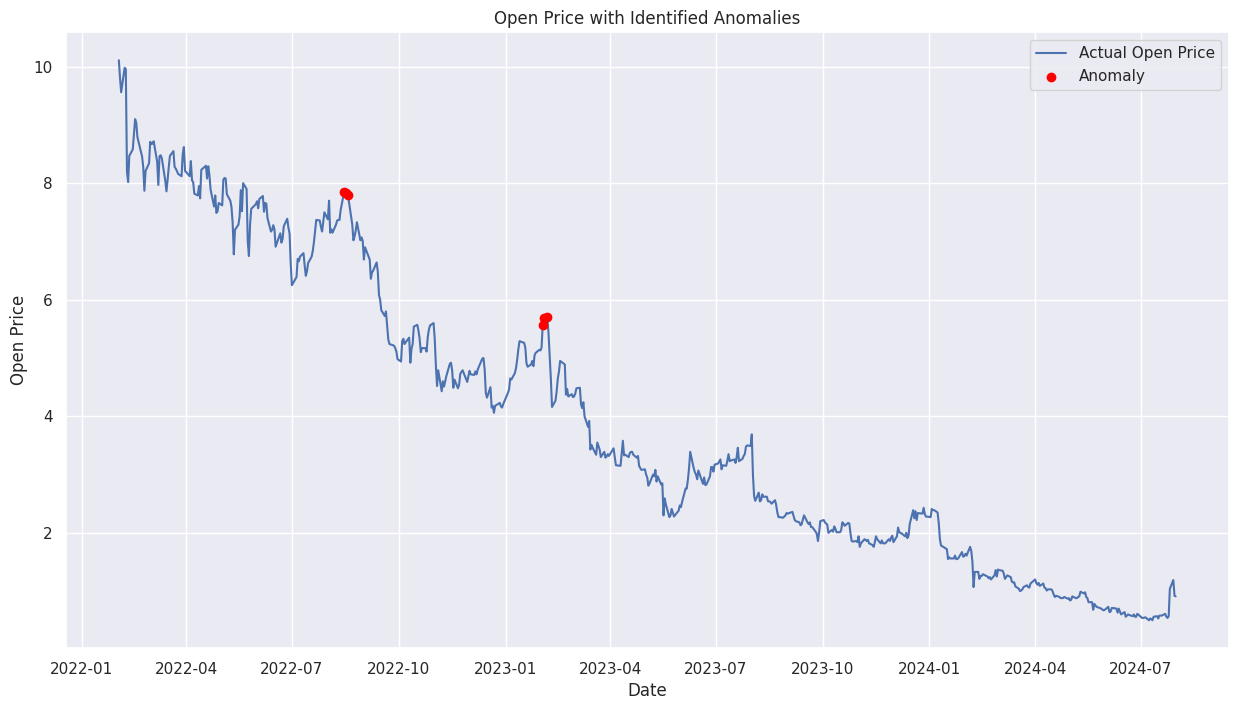

In [ ]:
# Visualize the 'Open' price with highlighted anomalies
plt.figure(figsize=(15, 8))
plt.plot(evaluation_df['Date'], evaluation_df['Open'], label='Actual Open Price')
plt.scatter(anomalies['Date'], anomalies['Open'], color='red', label='Anomaly', zorder=5)
plt.title('Open Price with Identified Anomalies')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# Define parameter grid - Using the best parameters found in the previous step
best_params = {'changepoint_prior_scale': 0.001, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}

# Train the final model with the best parameters
final_model = Prophet(**best_params)
final_model.fit(df_prophet)

initial = '2555 days'
# Period for each fold: e.g., retrain the model every 1 year (approx 365 days)
period = '365 days'
# Horizon for forecasting: e.g., forecast 1 year ahead (approx 365 days)
horizon = '365 days'

print(f"Performing time series cross-validation with initial training period: {initial}, period: {period}, horizon: {horizon}")

# Use the cross_validation function with the final trained Prophet model
df_cv = cross_validation(final_model, initial=initial, period=period, horizon=horizon, parallel="processes")

# Print or display the head of the df_cv DataFrame to inspect the cross-validation results.
print("\nHead of Cross-Validation Results:")
display(df_cv.head())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/l_ojyp94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/ob2w95xx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26344', 'data', 'file=/tmp/tmp_cciamly/l_ojyp94.json', 'init=/tmp/tmp_cciamly/ob2w95xx.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modelcgkc3i0d/prophet_model-20250904120442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoffs between 2022-08-01 00:00:00 and 2023-08-01 00:00:00
INFO:prophet:Applying in parallel with <concu

Performing time series cross-validation with initial training period: 2555 days, period: 365 days, horizon: 365 days


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/icgv9vmk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/r4dycy3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/axlajix7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73329', 'data', 'file=/tmp/tmp_cciamly/icgv9vmk.json', 'init=/tmp/tmp_cciamly/axlajix7.json', 'output', 'file=/tmp/tmp_cciamly/prophet_modeln496xpw2/prophet_model-20250904120443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_cciamly/6jbq6g7h.json
12:04:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31243', 'data


Head of Cross-Validation Results:


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-02,6.897644,0.788169,13.142869,7.70,2022-08-01
1,2022-08-03,6.897933,1.161237,12.783384,7.15,2022-08-01
2,2022-08-04,6.893141,0.947524,12.835577,7.21,2022-08-01
3,2022-08-05,6.890803,1.066348,12.864485,7.15,2022-08-01
4,2022-08-08,6.910630,1.239370,13.129955,7.29,2022-08-01


In [ ]:
import joblib

# Save the final_model object to a file
joblib.dump(final_model, 'prophet_model.joblib')

['prophet_model.joblib']

In [6]:
import gradio as gr
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np


def forecast_and_plot(days_to_forecast):
    try:
        # Load the saved Prophet model (trained on TCS stock data)
        model = joblib.load('prophet_model.joblib')
        global test  # Access global test DataFrame (TCS test set)

        # Create future dataframe
        future = model.make_future_dataframe(periods=days_to_forecast, freq='D')

        # Generate predictions
        forecast = model.predict(future)

        # --- Calculate Evaluation Metrics ---
        evaluation_forecast = forecast[forecast['ds'].isin(test.index)]
        evaluation_df = test.merge(
            evaluation_forecast[['ds', 'yhat']],
            left_index=True, right_on='ds', how='left'
        )

        if not evaluation_df.empty:
            mae = mean_absolute_error(evaluation_df['Open'], evaluation_df['yhat'])
            mse = mean_squared_error(evaluation_df['Open'], evaluation_df['yhat'])
            rmse = sqrt(mse)
            mape = (
                np.mean(np.abs((evaluation_df['Open'] - evaluation_df['yhat']) / evaluation_df['Open'])) * 100
                if np.any(evaluation_df['Open'] != 0) else float('inf')
            )

            evaluation_metrics_str = (
                f"📊 **Evaluation Metrics on TCS Test Set:**\n\n"
                f"🔹 MAE: {mae:.4f}\n"
                f"🔹 MSE: {mse:.4f}\n"
                f"🔹 RMSE: {rmse:.4f}\n"
                f"🔹 MAPE: {mape:.2f}%"
            )
        else:
            evaluation_metrics_str = "⚠️ No overlapping dates between forecast and test set for evaluation."

        # --- Forecast Summary ---
        last_actual = test['Open'].iloc[-1] if not test.empty else None
        first_pred = forecast['yhat'].iloc[-days_to_forecast]
        summary_str = (
            f"📌 Last Actual TCS Open Price: {last_actual:.2f}\n"
            f"📌 First Predicted TCS Open Price: {first_pred:.2f}"
            if last_actual else "No actual data available for summary."
        )

        # --- Generate Plots ---
        forecast_fig = model.plot(forecast)
        plt.title("📈 TCS Stock Price Forecast (Open Price)")
        plt.xlabel("Date")
        plt.ylabel("Open Price (INR)")
        plt.grid(True)

        components_fig = model.plot_components(forecast)

        # --- Rename columns for user-friendly display ---
        forecast_display = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].rename(
            columns={
                'ds': 'Date',
                'yhat': 'Predicted TCS Open Price',
                'yhat_lower': 'Lower Confidence',
                'yhat_upper': 'Upper Confidence'
            }
        )

        return (
            forecast_display,
            forecast_fig,
            components_fig,
            evaluation_metrics_str,
            summary_str
        )

    except Exception as e:
        return None, None, None, f"⚠️ Error: {str(e)}", "Error in forecast."


# Gradio Interface
interface = gr.Interface(
    fn=forecast_and_plot,
    inputs=gr.Slider(minimum=1, maximum=365, step=1, value=30, label="Number of days to forecast"),
    outputs=[
        gr.DataFrame(label="📊 Forecasted TCS Prices"),
        gr.Plot(label="📈 Forecast Plot"),
        gr.Plot(label="🔍 Forecast Components Plot"),
        gr.Textbox(label="📑 Evaluation Metrics"),
        gr.Textbox(label="📌 Forecast Summary")
    ],
    title="📈 TCS Stock Price Forecasting with Prophet",
    description=(
        "This app forecasts the **TCS stock Opening Price** using Facebook Prophet.\n\n"
        "⚠️ **Note:** The prices shown are based on *adjusted values* from Yahoo Finance "
        "(adjusted for splits and dividends). These values may appear lower than the "
        "actual traded market price (₹3000+), but trends and percentage changes remain accurate."
    )
)

# Run locally
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f8a238561d965ddc37.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## LSTM Model (RNN)

df_final_model recreated successfully.
Data prep complete ✅
X_train: (1724, 60, 1), y_train: (1724,)
X_test: (566, 60, 1), y_test: (566,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model...
Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0326 - val_loss: 7.7942e-04
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - val_loss: 3.1326e-04
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - val_loss: 2.6470e-04
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - val_loss: 2.3134e-04
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0033 - val_loss: 3.1887e-04
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029 - val_loss: 2.1240e-04
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - val_loss: 3.2689e-04
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025 - val_loss: 1.8479e-04
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025 - val_loss: 2.7756e-04
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022 - val_loss: 2.0707e-04
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - val_loss: 3.9606e

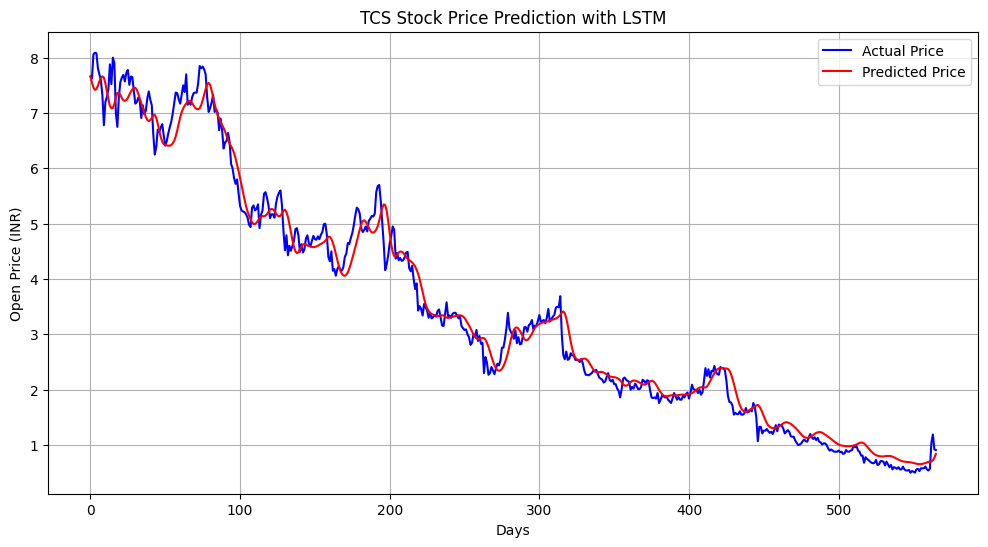

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

try:
    df = pd.read_csv('TCS.csv') # Replace 'TCS.csv' with your actual data file name
    df['Date'] = pd.to_datetime(df['Date'])
    df_final_model = df.set_index('Date') # Assuming 'Date' is the time index
    print("df_final_model recreated successfully.")
except FileNotFoundError:
    print("Error: Original data file (e.g., 'TCS.csv') not found.")

# Select Open price
open_prices = df_final_model['Open'].values.reshape(-1, 1)

# Scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_open_prices = scaler.fit_transform(open_prices)

split_date = pd.to_datetime('2022-02-02')
train = df_final_model[df_final_model.index < split_date]
test = df_final_model[df_final_model.index >= split_date]


train_size = len(train)
train_data = scaled_open_prices[:train_size, :]
test_data = scaled_open_prices[train_size:, :]

# Create sequences
def create_sequences(data, time_step=60):
    X, Y = [], []
    # Ensure we have enough data points to create at least one sequence
    if len(data) <= time_step:
        return np.array(X), np.array(Y)

    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Data prep complete")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# --- LSTM Model ---
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Add EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
print("Training LSTM model...")
history = model_lstm.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)
print("Training complete")

# --- Predictions & Inverse Scaling ---
y_pred = model_lstm.predict(X_test)

# Inverse transform
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# --- Evaluation Metrics ---
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
# Calculate MAPE, handling potential division by zero
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100 if np.any(y_test_rescaled != 0) else float('inf')


print(f"\n Evaluation Metrics (TCS Open Price):")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


# --- Plot Results ---
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(y_pred_rescaled, label="Predicted Price", color="red")
plt.title("TCS Stock Price Prediction with LSTM")
plt.xlabel("Days")
plt.ylabel("Open Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Save the LSTM model in the native Keras SavedModel format
model_lstm.save('lstm_model.keras')

print("LSTM model saved successfully in Keras SavedModel format.")

LSTM model saved successfully in Keras SavedModel format.


In [9]:
import joblib
from prophet.serialize import model_to_json

# 1. Load the model from joblib
model = joblib.load("prophet_model.joblib")

# 2. Save the model into JSON
with open("prophet_model.json", "w") as f:
    f.write(model_to_json(model))

print("Model successfully converted to prophet_model.json")



✅ Model successfully converted to prophet_model.json
